<a href="https://colab.research.google.com/github/pumkinni/book_study/blob/master/%ED%98%BC%EA%B3%B5_%EB%A8%B8_%EB%94%A5_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법
> 경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배움

> 점진적 학습 : 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련

#### 경사 하강법의 종류
- 확률적 경사 하강법
> 샘플 1개씩 꺼내기

- 미니배치 경사 하강법 
> 샘플 여러 개씩 꺼내기

- 배치 경사 하강법 
> 샘플 다 꺼내기

#### 손실함수와 비용함수(머신러닝 알고리즘이 얼마나 엉터리인지 측정)

- 손실함수 : 샘플 하나에 대한 손실

- 비용함수 : 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합

#### 손실함수 종류

- 로지스틱 손실함수(이진분류)
  > 타깃 = 1일 때 -log(예측 확률)

  > 타깃 = 0일 때 -log(1 - 예측확률)
  
- 이진 크로스엔트로피 손실함수(이진분류)

- 크로스엔트로피 손실함수(다중분류)

SGDClassifier

In [ ]:
# 데이터 정리
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv')

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# input 데이터와 target 데이터 구분
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 훈련 데이터와 테스트 데이터 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# SGDClassifier를 이용하여 훈련 후 정확도 측정
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42) # loss = '손실함수 종류'(로지스틱 함수), max_iter = '에포크 횟수'(전체훈련세트 10번 반복)
sc.fit(train_scaled, train_target)
sc.score(train_scaled, train_target), sc.score(test_scaled, test_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


(0.773109243697479, 0.775)

In [ ]:
# 1에포크 더 훈련 (정확도가 더 좋아짐)
sc.partial_fit(train_scaled, train_target) #모델을 이어서 훈련(호출할 때마다 1에포크씩 이어서 훈련)
sc.score(train_scaled, train_target), sc.score(test_scaled, test_target)

(0.8151260504201681, 0.85)

#### 에포크와 과대/과소적합
> 에포크(0~300)의 변화에 따른 훈련 정확도와 테스트 정확도 그래프로 확인

In [ ]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

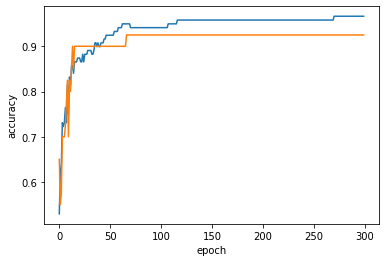

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# epoch = 100일 때 훈련 후 정확도 확인
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state =42)# tol = None으로 지정하여 자동으로 멈추지 않게 함
sc.fit(train_scaled, train_target)
sc.score(train_scaled, train_target), sc.score(test_scaled, test_target)

(0.957983193277311, 0.925)

- loss 매개변수

  >loss 매개변수의 기본값은 'hinge'
  
  > 힌지손실은 서포트 백터 머신을 위한 손실 함수
- 알아둬야 할 점

  >SGDClassifier가 여러 종류의 손실 함수를 loss매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원한다.